<a href="https://colab.research.google.com/github/BrotherKim/Colab/blob/main/SEP592/BK_resnet50_BRCA_classification_32_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Dataset 형태
datasets<br>
    &emsp;&emsp;└── test_set<br>
    &emsp;&emsp;│   &emsp;&emsp;├── class1<br>
    &emsp;&emsp;│   &emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
    &emsp;&emsp;│   &emsp;&emsp;└── class2<br>
    &emsp;&emsp;│       &emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>
    &emsp;&emsp;└── training_set<br>
        &emsp;&emsp;&emsp;&emsp;├── class1<br>
        &emsp;&emsp;&emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
        &emsp;&emsp;&emsp;&emsp;└── class2<br>
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>


# Parameter 및 Basemodel 설정

In [ ]:
IMAGE_SIZE = 224
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
NUM_CLASSES = 2
WEIGHT_DIR_PATH = '/content/gdrive/MyDrive/KAIST/SEP592/checkpoints'
WEIGHT_FILE_PATH = 'resnet50_brca_32_100_10_aug.h5'

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, pooling='avg', classes=NUM_CLASSES)
#baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseMode =ResNet50(include_top=True, weights=None, input_shape=INPUT_SHAPE, classes=NUM_CLASSES)

baseModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

#rootPath = '/content/datasets'
rootPath = '/content/gdrive/MyDrive/KAIST/dataset'
augPath = '/content/gdrive/MyDrive/KAIST/dataset_augmentation'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

In [ ]:
#!find /content/gdrive/MyDrive/KAIST/lym_augmentation -type f | wc -l

In [ ]:
#!cp -r /content/gdrive/MyDrive/KAIST/lym_aug1mentation/* /content/gdrive/MyDrive/KAIST/dataset_augmentation/train_set/lym/

In [ ]:
#!find /content/gdrive/MyDrive/KAIST/dataset_augmentation/train_set/lym -type f | wc -l

In [ ]:
#!cd /content/gdrive/MyDrive/KAIST/lym_aug1mentation/ && find ./ -name "*aug*" | sed -e 'p' -e "s/aug/aug1/g" |xargs -n 2 mv


In [ ]:
#!find /content/gdrive/MyDrive/KAIST/dataset_augmentation/train_set/normal -type f | wc -l

# Data Load

In [ ]:
!ls -l /content/gdrive/MyDrive/KAIST/dataset/test_set

total 8
drwx------ 2 root root 4096 May 30 05:32 lym
drwx------ 2 root root 4096 May 30 05:32 normal


In [ ]:
trainGen = imageGenerator.flow_from_directory(
    os.path.join(augPath, 'train_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='training',
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(augPath, 'train_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='validation',
)

Found 36161 images belonging to 2 classes.
Found 4017 images belonging to 2 classes.


In [ ]:
normalTrainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='training',
)

normalValidationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    subset='validation'
)

Found 21181 images belonging to 2 classes.
Found 2352 images belonging to 2 classes.


# Model setting

In [ ]:
for i, l in enumerate(baseModel.layers):
  print(i, l.name)

0 input_5
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
from keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D, Dense, BatchNormalization

#x = baseModel.output
#x = MaxPooling2D(pool_size=(2, 2))(x)
#x = Flatten()(x)
#x = Dropout(0.5)(x)
#x = Dense(512, activation='relu', input_dim=INPUT_SHAPE)(x)
#x = BatchNormalization()(x)
#x = Dense(256, activation ='relu')(x)
#x = BatchNormalization()(x)
#x = Dense(NUM_CLASSES, activation='softmax')(x)

#model = Model(
#    inputs=baseModel.input
#    , outputs=x
#    )

model = Sequential()

model.add(baseModel)
model.add(Dense(NUM_CLASSES, activation='softmax'))
#model.layers[0].trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


# Finetuning

In [ ]:
NUM_FREEZE = 70

for l in baseModel.layers:
  l.trainable = False

for l in baseModel.layers[NUM_FREEZE:]:
  l.trainable = True


In [ ]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=12-6, momentum=0.9, nesterov=True)

model.compile(
    optimizer=sgd, #optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['acc'],
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [150]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

model_ckpt = ModelCheckpoint('%s/%s' % (WEIGHT_DIR_PATH, WEIGHT_FILE_PATH),save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
early_stop = EarlyStopping(patience=10,verbose=2,monitor='loss')

epochs = 32
history = model.fit_generator(
    trainGen,  
    epochs=epochs,
    steps_per_epoch=trainGen.samples//epochs, 
    validation_data=validationGen,
    validation_steps=validationGen.samples//epochs,
    callbacks=[reduce_lr,early_stop],
    workers=1000,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
1130/1130 [==============================] - 742s 642ms/step - loss: 0.5247 - acc: 0.7406 - val_loss: 0.7873 - val_acc: 0.5915
Epoch 2/32
1130/1130 [==============================] - 638s 558ms/step - loss: 0.4825 - acc: 0.7712 - val_loss: 0.6041 - val_acc: 0.6855
Epoch 3/32
1130/1130 [==============================] - 591s 517ms/step - loss: 0.4699 - acc: 0.7788 - val_loss: 0.6111 - val_acc: 0.6898
Epoch 4/32
1130/1130 [==============================] - 634s 554ms/step - loss: 0.4657 - acc: 0.7829 - val_loss: 0.5575 - val_acc: 0.7095
Epoch 5/32
1130/1130 [==============================] - 639s 559ms/step - loss: 0.4606 - acc: 0.7852 - val_loss: 0.6299 - val_acc: 0.6752
Epoch 6/32
1130/1130 [==============================] - 641s 561ms/step - loss: 0.4537 - acc: 0.7899 - val_loss: 0.7719 - val_acc: 0.6180
Epoch 7/32
1130/1130 [==============================] - 643s 562ms/step - loss: 0.4519 - acc: 0.7883 - val_loss: 0.6342 - val_acc: 0.6735
Epoch 8/32
1130/1130 [============

In [151]:
#model.save_weights("/content/gdrive/MyDrive/KAIST/SEP592/checkpoints/resnet50_brca_ckpt")
!mkdir -p WEIGHT_DIR_PATH
WEIGHT_FILE_PATH = '210608_0741_resnet50_brca_12_300_300_aug.h5'

model.save_weights('%s/%s' % (WEIGHT_DIR_PATH, WEIGHT_FILE_PATH))

# `assert_consumed` can be used as validation that all variable values have been
# restored from the checkpoint. See `tf.train.Checkpoint.restore` for other
# methods in the Status object.
#load_status.assert_consumed()

#학습 결과 시각화

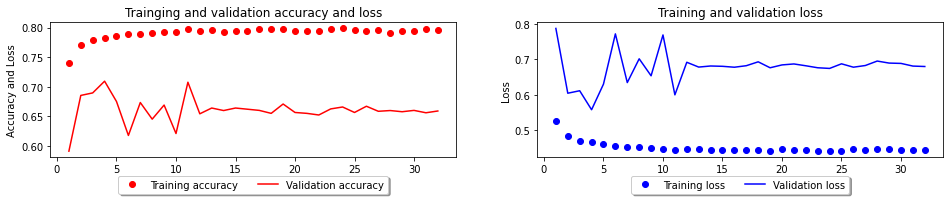

In [152]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()
show_graph(history.history)


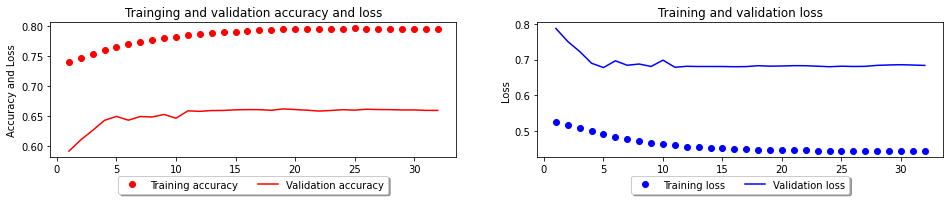

In [153]:
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)


#모델 평가

In [ ]:
!ls -l /content/gdrive/MyDrive/KAIST/SEP592/checkpoints | grep resnet50 | grep brca

-rw------- 1 root root 6144 Jun  7 23:29 210608_0741_resnet50_brca_12_300_300_aug.h5
-rw------- 1 root root 6144 Jun  7 12:31 resnet50_brca_32_100_100_aug.h5
-rw------- 1 root root 6144 Jun  7 17:16 resnet50_brca_32_100_100_aug_test.h5
-rw------- 1 root root 6144 Jun  6 12:36 resnet50_brca_32_100_10_2.h5
-rw------- 1 root root 6144 Jun  7 04:24 resnet50_brca_32_100_10_aug.h5
-rw------- 1 root root 6144 Jun  6 04:07 resnet50_brca_32_100_10.h5
-rw------- 1 root root 6144 Jun  5 06:01 resnet50_brca_32_100.h5


In [ ]:
load_status = model.load_weights('%s/%s' % (WEIGHT_DIR_PATH, '210608_0741_resnet50_brca_12_300_300_aug.h5'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [154]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = testGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle = False, 
)

testtrainGen = testGenerator.flow_from_directory(
    os.path.join(augPath, 'train_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle = False, 
)

Found 9816 images belonging to 2 classes.
Found 40178 images belonging to 2 classes.


In [155]:
import itertools    
from itertools import chain

testAllGen = chain(testtrainGen, testGen)

In [157]:
#model.evaluate_generator(testGen)
testevaluation = model.evaluate_generator(testGen, verbose=1, steps=testGen.samples//32, workers = 300)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


306/306 [==============================] - 62s 194ms/step - loss: 0.6860 - acc: 0.8133


In [158]:
testevaluation

[0.6859663128852844, 0.8133170008659363]

In [173]:
#Predicting the classes of images
testprediction = model.predict_generator(testGen, verbose=1, steps=testGen.samples//32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


306/306 [==============================] - 112s 364ms/step


In [174]:
len(testprediction)

9792

In [178]:
print(testGen.class_indices)
print(testprediction)

{'lym': 0, 'normal': 1}
[[0.26929733 0.73070264]
 [0.05991477 0.94008523]
 [0.07554401 0.924456  ]
 ...
 [0.02772014 0.97227985]
 [0.06383805 0.93616194]
 [0.00368958 0.9963104 ]]


In [172]:
labels = []
for _,y in testGen:
    labels.extend(list(y))
labels

KeyboardInterrupt: ignored

In [176]:
len(testGen.classes)

9816

0.5000000342706588


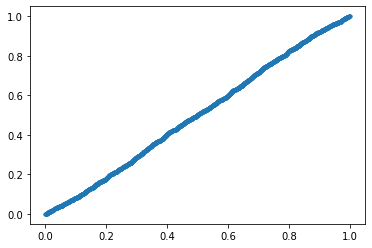

In [177]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction.ravel()[:9816])
auc_pred = auc(nn_fpr, nn_tpr)
plt.plot(nn_fpr, nn_tpr, marker='.', label='test')
print(auc_pred)

In [179]:
len(testGen.labels)
#for i in range(100):

# answer가 0인데 predict가 1이면 failCntArr[0]++
failCntArr = [0, 0]
allCntArr = [0, 0]
for i in range(len(testprediction)):
  prdIdx = 1 if testprediction[i][0] < testprediction[i][1] else 0
  ansIdx = testGen.labels[i]
  allCntArr[ansIdx] += 1

  if prdIdx == ansIdx : continue
  print('[FAIL] predict[%d], answer[%d]' % (prdIdx, ansIdx))
  failCntArr[ansIdx] += 1

print('Pass cnt : lym[%d/%d], normal[%d/%d]' % (failCntArr[0], allCntArr[0], failCntArr[1], allCntArr[1]))

[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict[1], answer[0]
[FAIL] predict